<a href="https://colab.research.google.com/github/senfara1389/StrokeDetection/blob/main/Detekcijasloga_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prvih 5 clanova radi pregleda svih kolona: 
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
Ukupan broj 

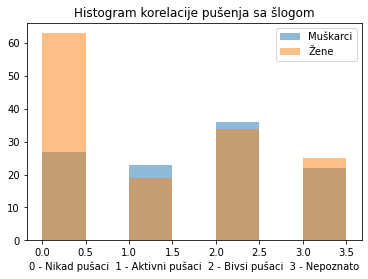

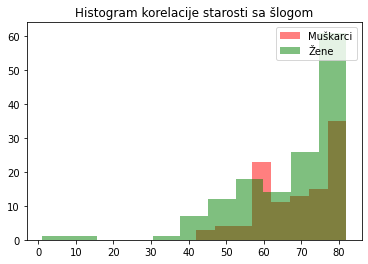

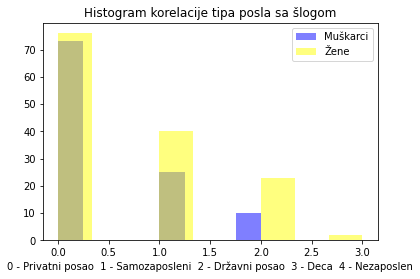

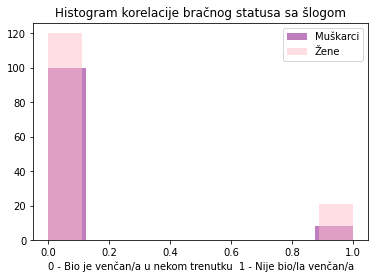

count    5090.000000
mean        0.054224
std         0.226481
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: heart_disease, dtype: float64
4814


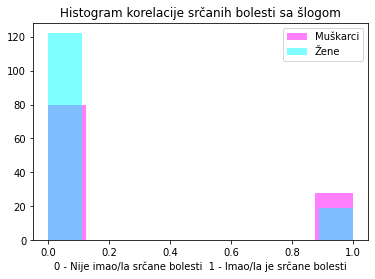

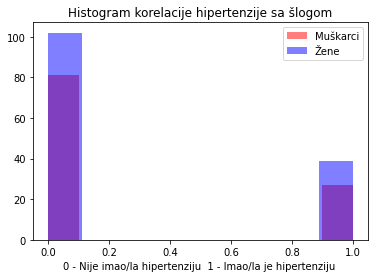

count    5090.000000
mean        0.097839
std         0.297126
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: hypertension, dtype: float64
4592


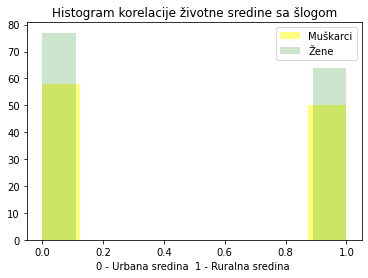

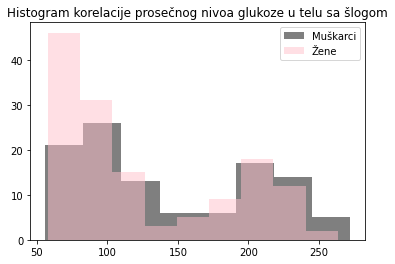

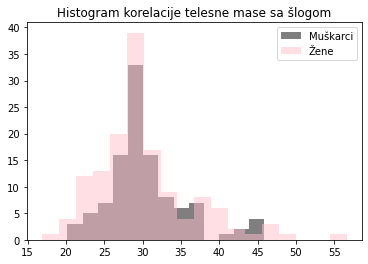

Tačnost modela je: 0.771
INFO:tensorflow:Assets written to: slog.model/assets
[[7.2011280e-01]
 [1.2505054e-04]]
Predvidjeno je da ce osoba imati slog
Predvidjeno je da osoba nece imati slog


In [3]:
import numpy as np
from numpy import argmax
import matplotlib.pyplot as plt
import scipy as sp
from scipy import linalg
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential
from keras.layers.core import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
import imblearn
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

#pd.set_option("display.max_rows", 5110, "display.max_columns", 12)
#np.set_printoptions(threshold=np.inf)
pd.set_option('display.max_columns', None)#prikazivanje svih kolona(features-a), gde pise \ je prelaz u novi red ali se odnosi na iste features-a iz reda iznad
dataset=pd.read_csv('Detekcija_sloga.csv')
print("Prvih 5 clanova radi pregleda svih kolona: ")
print(dataset.head())
print("Ukupan broj NaN vrednosti po kolonama: ")
print(dataset.isnull().sum())
print("Sve vrednosti koje se mogu naci za hiperzenziju: ")
print(dataset.hypertension.unique())
print("Sve vrednosti koje se mogu naci za srcanim bolestima: ")
print(dataset.heart_disease.unique())
print("Sve vrednosti koje se mogu naci za pol: ")
print(dataset.gender.unique())
print("Sve vrednosti koje se mogu naci za target vrednost: ")
print(dataset.stroke.unique())
print("Sve vrednosti koje se mogu naci za pusacki status: ")
print(dataset.smoking_status.unique())
print("Sve vrednosti koje se mogu naci za bracni status: ")
print(dataset.ever_married.unique())
print("Sve vrednosti koje se mogu naci za tip posla: ")
print(dataset.work_type.unique())
print("Sve vrednosti koje se mogu naci za tip boravisnog mesta: ")
print(dataset.Residence_type.unique())

dataset['gender'] = dataset['gender'].replace(['Male'],0)
dataset['gender'] = dataset['gender'].replace(['Female'],1)
dataset['gender'] = dataset['gender'].replace(['Other'],2)
dataset['smoking_status'] = dataset['smoking_status'].replace(['never smoked'],0)
dataset['smoking_status'] = dataset['smoking_status'].replace(['smokes'],1)
dataset['smoking_status'] = dataset['smoking_status'].replace(['formerly smoked'],2)
dataset['smoking_status'] = dataset['smoking_status'].replace(['Unknown'],3)
dataset['ever_married'] = dataset['ever_married'].replace(['Yes'],0)
dataset['ever_married'] = dataset['ever_married'].replace(['No'],1)
dataset['work_type'] = dataset['work_type'].replace(['Private'],0)
dataset['work_type'] = dataset['work_type'].replace(['Self-employed'],1)
dataset['work_type'] = dataset['work_type'].replace(['Govt_job'],2)
dataset['work_type'] = dataset['work_type'].replace(['children'],3)
dataset['work_type'] = dataset['work_type'].replace(['Never_worked'],4)
dataset['Residence_type'] = dataset['Residence_type'].replace(['Urban'],0)
dataset['Residence_type'] = dataset['Residence_type'].replace(['Rural'],1)
dataset.drop('id', inplace=True, axis=1)
dataset.fillna(dataset.mean(), inplace=True)
dataset.age = dataset.age.round(0).astype(int)
print("Prebrojavamo koliko ima redova u kojima su godine nevalidne(jednake nuli): ")
print((dataset['age'] == 0).sum())
dataset = dataset.loc[dataset["age"] != 0]
print("Ponovna provera nakon izbacivanja redova se nevalidnim vrednostima: ")
print((dataset['age'] == 0).sum())


muskarci=dataset[dataset.columns[[0,9,10]]]
muskarci=muskarci.loc[dataset['gender'] == 0]
muskarci=muskarci.loc[dataset['stroke'] == 1]
NPmuskarci=np.array((muskarci['smoking_status']))
zene=dataset[dataset.columns[[0,9,10]]]
zene=zene.loc[dataset['gender'] == 1]
zene=zene.loc[dataset['stroke'] == 1]
NPzene=np.array((zene['smoking_status']))

plt.hist(NPmuskarci,bins=np.array([0,0.5,1,1.5,2,2.5,3,3.5]), alpha=0.5, label='Muškarci')
plt.hist(NPzene,bins=np.array([0,0.5,1,1.5,2,2.5,3,3.5]), alpha=0.5, label='Žene')
plt.legend(loc='upper right')
plt.title("Histogram korelacije pušenja sa šlogom")
plt.xlabel("0 - Nikad pušaci  1 - Aktivni pušaci  2 - Bivsi pušaci  3 - Nepoznato")
plt.show()

muskarci=dataset[dataset.columns[[0,1,10]]]
muskarci=muskarci.loc[dataset['gender'] == 0]
muskarci=muskarci.loc[dataset['stroke'] == 1]
NPmuskarci=np.array((muskarci['age']))
zene=dataset[dataset.columns[[0,1,10]]]
zene=zene.loc[dataset['gender'] == 1]
zene=zene.loc[dataset['stroke'] == 1]
NPzene=np.array((zene['age']))

plt.hist(NPmuskarci,bins='auto', alpha=0.5, label='Muškarci', color='red')
plt.hist(NPzene,bins='auto', alpha=0.5, label='Žene', color='green')
plt.legend(loc='upper right')
plt.title("Histogram korelacije starosti sa šlogom")
plt.show()

dataset.loc[dataset['age']<=11,'age'] = 0
dataset.loc[(dataset['age']>11) & (dataset['age']<=27),'age'] = 1
dataset.loc[(dataset['age']>27) & (dataset['age']<=36),'age'] = 2
dataset.loc[(dataset['age']>36) & (dataset['age']<=45),'age'] = 3
dataset.loc[(dataset['age']>45) & (dataset['age']<=54),'age'] = 4
dataset.loc[(dataset['age']>54) & (dataset['age']<=63),'age'] = 5
dataset.loc[dataset['age']>63,'age'] = 6
dataset.age = dataset.age.round(0).astype(int)

muskarci=dataset[dataset.columns[[0,5,10]]]
muskarci=muskarci.loc[dataset['gender'] == 0]
muskarci=muskarci.loc[dataset['stroke'] == 1]
NPmuskarci=np.array((muskarci['work_type']))
zene=dataset[dataset.columns[[0,5,10]]]
zene=zene.loc[dataset['gender'] == 1]
zene=zene.loc[dataset['stroke'] == 1]
NPzene=np.array((zene['work_type']))

plt.hist(NPmuskarci,bins='auto', alpha=0.5, label='Muškarci', color='blue')
plt.hist(NPzene,bins='auto', alpha=0.5, label='Žene', color='yellow')
plt.legend(loc='upper right')
plt.title("Histogram korelacije tipa posla sa šlogom")
plt.xlabel("0 - Privatni posao  1 - Samozaposleni  2 - Državni posao  3 - Deca  4 - Nezaposlen")
plt.show()


muskarci=dataset[dataset.columns[[0,4,10]]]
muskarci=muskarci.loc[dataset['gender'] == 0]
muskarci=muskarci.loc[dataset['stroke'] == 1]
NPmuskarci=np.array((muskarci['ever_married']))
zene=dataset[dataset.columns[[0,4,10]]]
zene=zene.loc[dataset['gender'] == 1]
zene=zene.loc[dataset['stroke'] == 1]
NPzene=np.array((zene['ever_married']))

plt.hist(NPmuskarci,bins='auto', alpha=0.5, label='Muškarci', color='purple')
plt.hist(NPzene,bins='auto', alpha=0.5, label='Žene', color='pink')
plt.legend(loc='upper right')
plt.title("Histogram korelacije bračnog statusa sa šlogom")
plt.xlabel("0 - Bio je venčan/a u nekom trenutku  1 - Nije bio/la venčan/a")
plt.show()

muskarci=dataset[dataset.columns[[0,3,10]]]
muskarci=muskarci.loc[dataset['gender'] == 0]
muskarci=muskarci.loc[dataset['stroke'] == 1]
NPmuskarci=np.array((muskarci['heart_disease']))
zene=dataset[dataset.columns[[0,3,10]]]
zene=zene.loc[dataset['gender'] == 1]
zene=zene.loc[dataset['stroke'] == 1]
NPzene=np.array((zene['heart_disease']))

#provera koliko ima istih vrednosti na ukupno skupljenih vrednosti da znamo da li bi smo mogli da iskoristimo ovo 
#jer histogram ne odgovara ocekivanim rezultatima da srcana bolest povecava sanse sloga
print(dataset.heart_disease.describe())
print((dataset['heart_disease'] == 0).sum())
#zakljucujemo da ima previse istih podataka da bi ova kolona mogla da se uzme u obzir


plt.hist(NPmuskarci,bins='auto', alpha=0.5, label='Muškarci', color='magenta')
plt.hist(NPzene,bins='auto', alpha=0.5, label='Žene', color='cyan')
plt.legend(loc='upper right')
plt.title("Histogram korelacije srčanih bolesti sa šlogom")
plt.xlabel("0 - Nije imao/la srčane bolesti  1 - Imao/la je srčane bolesti")
plt.show()

muskarci=dataset[dataset.columns[[0,2,10]]]
muskarci=muskarci.loc[dataset['gender'] == 0]
muskarci=muskarci.loc[dataset['stroke'] == 1]
NPmuskarci=np.array((muskarci['hypertension']))
zene=dataset[dataset.columns[[0,2,10]]]
zene=zene.loc[dataset['gender'] == 1]
zene=zene.loc[dataset['stroke'] == 1]
NPzene=np.array((zene['hypertension']))

plt.hist(NPmuskarci,bins='auto', alpha=0.5, label='Muškarci', color='red')
plt.hist(NPzene,bins='auto', alpha=0.5, label='Žene', color='blue')
plt.legend(loc='upper right')
plt.title("Histogram korelacije hipertenzije sa šlogom")
plt.xlabel("0 - Nije imao/la hipertenziju  1 - Imao/la je hipertenziju ")
plt.show()

#ista prica kao i za srcana oboljenja
print(dataset.hypertension.describe())
print((dataset['hypertension'] == 0).sum())
#zakljucujemo da ima previse istih podataka da bi ova kolona mogla da se uzme u obzir


muskarci=dataset[dataset.columns[[0,6,10]]]
muskarci=muskarci.loc[dataset['gender'] == 0]
muskarci=muskarci.loc[dataset['stroke'] == 1]
NPmuskarci=np.array((muskarci['Residence_type']))
zene=dataset[dataset.columns[[0,6,10]]]
zene=zene.loc[dataset['gender'] == 1]
zene=zene.loc[dataset['stroke'] == 1]
NPzene=np.array((zene['Residence_type']))

plt.hist(NPmuskarci,bins='auto', alpha=0.5, label='Muškarci', color='yellow')
plt.hist(NPzene,bins='auto', alpha=0.2, label='Žene', color='green')
plt.legend(loc='upper right')
plt.title("Histogram korelacije životne sredine sa šlogom")
plt.xlabel("0 - Urbana sredina  1 - Ruralna sredina ")
plt.show()

muskarci=dataset[dataset.columns[[0,7,10]]]
muskarci=muskarci.loc[dataset['gender'] == 0]
muskarci=muskarci.loc[dataset['stroke'] == 1]
NPmuskarci=np.array((muskarci['avg_glucose_level']))
zene=dataset[dataset.columns[[0,7,10]]]
zene=zene.loc[dataset['gender'] == 1]
zene=zene.loc[dataset['stroke'] == 1]
NPzene=np.array((zene['avg_glucose_level']))

plt.hist(NPmuskarci,bins='auto', alpha=0.5, label='Muškarci', color='black')
plt.hist(NPzene,bins='auto', alpha=0.5, label='Žene', color='pink')
plt.legend(loc='upper right')
plt.title("Histogram korelacije prosečnog nivoa glukoze u telu sa šlogom")
plt.show()

dataset.loc[dataset['avg_glucose_level']<=50,'avg_glucose_level'] = 0
dataset.loc[(dataset['avg_glucose_level']>50) & (dataset['avg_glucose_level']<=100),'avg_glucose_level'] = 1
dataset.loc[(dataset['avg_glucose_level']>100) & (dataset['avg_glucose_level']<=150),'avg_glucose_level'] = 2
dataset.loc[(dataset['avg_glucose_level']>150) & (dataset['avg_glucose_level']<=200),'avg_glucose_level'] = 3
dataset.loc[dataset['avg_glucose_level']>200,'avg_glucose_level'] = 4
dataset.avg_glucose_level = dataset.avg_glucose_level.round(0).astype(int)

muskarci=dataset[dataset.columns[[0,8,10]]]
muskarci=muskarci.loc[dataset['gender'] == 0]
muskarci=muskarci.loc[dataset['stroke'] == 1]
NPmuskarci=np.array((muskarci['bmi']))
zene=dataset[dataset.columns[[0,8,10]]]
zene=zene.loc[dataset['gender'] == 1]
zene=zene.loc[dataset['stroke'] == 1]
NPzene=np.array((zene['bmi']))

plt.hist(NPmuskarci,bins='auto', alpha=0.5, label='Muškarci', color='black')
plt.hist(NPzene,bins='auto', alpha=0.5, label='Žene', color='pink')
plt.legend(loc='upper right')
plt.title("Histogram korelacije telesne mase sa šlogom")
plt.show()

dataset.loc[dataset['bmi']<=15,'bmi'] = 0
dataset.loc[(dataset['bmi']>15) & (dataset['bmi']<=25),'bmi'] = 1
dataset.loc[(dataset['bmi']>25) & (dataset['bmi']<=35),'bmi'] = 2
dataset.loc[(dataset['bmi']>35) & (dataset['bmi']<=45),'bmi'] = 3
dataset.loc[(dataset['bmi']>45) & (dataset['bmi']<=55),'bmi'] = 4
dataset.loc[(dataset['bmi']>55) & (dataset['bmi']<=65),'bmi'] = 5
dataset.loc[dataset['bmi']>65,'bmi'] = 6
dataset.bmi = dataset.bmi.round(0).astype(int)

dataset.drop('hypertension', inplace=True, axis=1)
dataset.drop('heart_disease', inplace=True, axis=1)

#Nacin sa smanjivanjem skupa radi balansiranja podataka


#dataset_reduced=dataset[dataset['stroke'] == 0].sample(n=230)
#dataset_reduced_positive=dataset[dataset['stroke'] == 1].sample(n=230)
#dataset_reduced=dataset_reduced.append(dataset_reduced_positive)

#Nacin sa oversamplingom

X=dataset.iloc[:,0:8].values
Y=dataset.iloc[:,8].values

oversample = RandomOverSampler(sampling_strategy='minority')
X_over, Y_over = oversample.fit_resample(X, Y)
model = Sequential()

model.add(Dense(8, input_shape=(8,)))

X_obucavajuci, X_testirajuci, Y_obucavajuci, Y_testirajuci= train_test_split(X_over, Y_over, test_size=0.15, random_state= 1)
n_features = X_obucavajuci.shape[1]
model.add(Dense(8, activation='relu', kernel_initializer='uniform',input_shape=(n_features,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
X_obucavajuci = np.asarray(X_obucavajuci).astype('float32')
X_testirajuci = np.asarray(X_testirajuci).astype('float32')
tf.convert_to_tensor(X_obucavajuci)
tf.convert_to_tensor(Y_obucavajuci)
model.fit(X_obucavajuci, Y_obucavajuci, epochs=300, batch_size=30, verbose=0)
loss, acc = model.evaluate(X_testirajuci, Y_testirajuci, verbose=0)
print('Tačnost modela je: %.3f' % acc)


import warnings
warnings.filterwarnings("ignore")
model.save('slog.model')
new_model = tf.keras.models.load_model('slog.model')
array1 = [1,6,0,0,0,0,2,0]
array2 = [1,2,1,2,1,2,3,2]

predikcije = new_model.predict([array1, array2])
print(predikcije)

if predikcije[0]>0.5:
  print("Predvidjeno je da ce osoba imati slog")
else:
  print("Predvidjeno je da osoba nece imati slog")

if predikcije[1]>0.5:
  print("Predvidjeno je da ce osoba imati slog")
else:
  print("Predvidjeno je da osoba nece imati slog")

